In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('drug_event_reports.csv')
df. head()

,Safety Report ID,Transmission Date,Serious,Seriousness Death,Received Date,Patient Age,Patient Sex,Reporter Country,Reactions,Drug Details
0,5801206-7,20090109,1,1.0,20080707,26.0,1.0,CANADA,DRUG ADMINISTRATION ERROR; OVERDOSE,"[{'drug_name': 'DURAGESIC-100', 'drug_indicati..."
1,10003300,20141002,1,NaN,20140306,77.0,2.0,US,Vomiting; Diarrhoea; Arthralgia; Headache,"[{'drug_name': 'BONIVA', 'drug_indication': 'O..."
2,10003301,20141002,1,NaN,20140228,NaN,2.0,US,Dyspepsia; Renal impairment,"[{'drug_name': 'IBUPROFEN', 'drug_indication':..."
3,10003302,20141002,2,NaN,20140312,NaN,1.0,US,Drug ineffective,"[{'drug_name': 'LYRICA', 'drug_indication': No..."
4,10003304,20141212,2,NaN,20140312,NaN,2.0,US,Drug hypersensitivity,"[{'drug_name': 'DOXYCYCLINE HYCLATE', 'drug_in..."


In [166]:
df.info() #Null and Non-Null count, DataType of every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Safety Report ID   10000 non-null  object 
 1   Transmission Date  10000 non-null  int64  
 2   Serious            10000 non-null  int64  
 3   Seriousness Death  707 non-null    float64
 4   Received Date      10000 non-null  int64  
 5   Patient Age        6650 non-null   float64
 6   Patient Sex        9926 non-null   float64
 7   Reporter Country   10000 non-null  object 
 8   Reactions          10000 non-null  object 
 9   Drug Details       10000 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 781.4+ KB


In [6]:
df.describe()

,Transmission Date,Serious,Seriousness Death,Received Date,Patient Age,Patient Sex
count,1.000000e+04,10000.000000,707.000000,1.000000e+04,6650.000000,9926.000000
mean,2.014430e+07,1.464200,1.008487,2.014031e+07,63.930827,1.492142
std,8.368302e+03,0.498742,0.091796,5.960894e+02,363.550099,0.660271
min,2.009011e+07,1.000000,1.000000,2.008071e+07,0.000000,0.000000
25%,2.014100e+07,1.000000,1.000000,2.014031e+07,47.000000,1.000000
50%,2.014100e+07,1.000000,1.000000,2.014031e+07,61.000000,2.000000
75%,2.014121e+07,2.000000,1.000000,2.014031e+07,72.000000,2.000000
max,2.024072e+07,2.000000,2.000000,2.014031e+07,22240.000000,2.000000


In [7]:
df.isnull().sum()

Safety Report ID        0
Transmission Date       0
Serious                 0
Seriousness Death    9293
Received Date           0
Patient Age          3350
Patient Sex            74
Reporter Country        0
Reactions               0
Drug Details            0
dtype: int64

In [172]:
#Converting Date from Object to Date Format

df['T_Date'] = pd.to_datetime(df['Transmission Date'].astype(str), format='%Y%m%d')
df['R_Date'] = pd.to_datetime(df['Received Date'].astype(str), format= '%Y%m%d')

#Duplicating the dataframe
df1 = df.copy()

#Dropped the columns which are no use now.
df1= df.drop(columns= ['Transmission Date', 'Received Date'], axis='columns')
df1.head()

,Safety Report ID,Serious,Seriousness Death,Patient Age,Patient Sex,Reporter Country,Reactions,Drug Details,T_Date,R_Date
0,5801206-7,1,1.0,26.0,1.0,CANADA,DRUG ADMINISTRATION ERROR; OVERDOSE,"[{'drug_name': 'DURAGESIC-100', 'drug_indicati...",2009-01-09,2008-07-07
1,10003300,1,NaN,77.0,2.0,US,Vomiting; Diarrhoea; Arthralgia; Headache,"[{'drug_name': 'BONIVA', 'drug_indication': 'O...",2014-10-02,2014-03-06
2,10003301,1,NaN,NaN,2.0,US,Dyspepsia; Renal impairment,"[{'drug_name': 'IBUPROFEN', 'drug_indication':...",2014-10-02,2014-02-28
3,10003302,2,NaN,NaN,1.0,US,Drug ineffective,"[{'drug_name': 'LYRICA', 'drug_indication': No...",2014-10-02,2014-03-12
4,10003304,2,NaN,NaN,2.0,US,Drug hypersensitivity,"[{'drug_name': 'DOXYCYCLINE HYCLATE', 'drug_in...",2014-12-12,2014-03-12


In [169]:
#Changing Datatype for Age and Seriousness Death from Float to Int
df1['Patient Age'] = df1['Patient Age'].astype('Int64') 
df1['Seriousness Death'] = df1['Seriousness Death'].astype('Int64')

#Replace values in column 'Patient Sex' from numerical codes to categorical labels (1.0 → 'M', 2.0 → 'F', 0.0 → Unknown)
df1['Patient Sex'] = df1['Patient Sex'].replace({1.0: 'M', 2.0: 'F', 0.0: 'Unknown'})


#Fill NA in Seriousness Death
df1['Seriousness Death'] = df1['Seriousness Death'].fillna(0)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Safety Report ID   10000 non-null  object        
 1   Serious            10000 non-null  int64         
 2   Seriousness Death  10000 non-null  Int64         
 3   Patient Age        6650 non-null   Int64         
 4   Patient Sex        9926 non-null   object        
 5   Reporter Country   10000 non-null  object        
 6   Reactions          10000 non-null  object        
 7   Drug Details       10000 non-null  object        
 8   T_Date             10000 non-null  datetime64[ns]
 9   R_Date             10000 non-null  datetime64[ns]
dtypes: Int64(2), datetime64[ns](2), int64(1), object(5)
memory usage: 800.9+ KB


In [112]:
#df1[df1['Patient Sex'].isna()].describe(include='all')

,Safety Report ID,Serious,Seriousness Death,Patient Age,Patient Sex,Reporter Country,Reactions,Drug Details,T_Date,R_Date,reaction_list
count,0,0.0,0.0,0.0,0,0,0,0,0,0,0
unique,0,NaN,<NA>,<NA>,0,0,0,0,NaN,NaN,0
top,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaT,NaT,NaN
min,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaT,NaT,NaN
25%,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaT,NaT,NaN
50%,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaT,NaT,NaN
75%,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaT,NaT,NaN
max,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaT,NaT,NaN


### Handling Missing Values in `Patient Sex`

Upon initial exploration, I found that the `Patient Sex` column contains **74 missing values** out of **10,000 records** (approximately **0.74%** of the dataset). Given that:

- The proportion of missing values is very small,
- The affected rows contain mostly `NaN` in other fields as well,
- And our analysis does not critically depend on these few entries,

I have decided to **remove these records** to maintain data quality and simplify downstream analysis.

In [170]:
df1= df1.dropna(subset='Patient Sex')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9926 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Safety Report ID   9926 non-null   object        
 1   Serious            9926 non-null   int64         
 2   Seriousness Death  9926 non-null   Int64         
 3   Patient Age        6635 non-null   Int64         
 4   Patient Sex        9926 non-null   object        
 5   Reporter Country   9926 non-null   object        
 6   Reactions          9926 non-null   object        
 7   Drug Details       9926 non-null   object        
 8   T_Date             9926 non-null   datetime64[ns]
 9   R_Date             9926 non-null   datetime64[ns]
dtypes: Int64(2), datetime64[ns](2), int64(1), object(5)
memory usage: 872.4+ KB


### Exploding the `Reactions` Column

In the dataset, each safety report (`Report ID`) can contain multiple adverse reactions grouped together in a single field. To analyze these reactions more effectively, I decided to **explode the `Reactions` column**, so that each reaction is represented as a separate row linked to its corresponding `Report ID`.

This transformation allows us to:
- Perform more granular analysis of reaction types
- Identify the most frequently reported reactions
- Explore potential patterns in severity or frequency of adverse events

By normalizing this field, I gain clearer insights into individual reaction trends across all reports.


In [92]:
df_reactions= df1[['Safety Report ID','Reactions']].copy()
#df_reactions.head()

# Clean whitespaces and split by semicolon

df_reactions['reaction_list'] = df_reactions['Reactions'].str.lower().str.strip().str.split(';')
df_reactions = df_reactions.explode('reaction_list')
df_reactions['reaction_list'] = df_reactions['reaction_list'].str.strip()  # Remove any leading/trailing whitespace
df_reactions = df_reactions.drop(columns=['Reactions']) #dropped the Reactions column
df_reactions.head()

,Safety Report ID,reaction_list
0,5801206-7,drug administration error
0,5801206-7,overdose
1,10003300,vomiting
1,10003300,diarrhoea
1,10003300,arthralgia


### Normalizing the `Drug Details` Column

The `Drug Details` column contains a list of dictionaries for each report, where each dictionary provides structured information such as:

- `drug_name`
- `drug_indication`
- `administration_route`

Since each safety report may involve multiple drugs, I normalized this field by:

1. **Parsing the list of drug dictionaries** from the original string format.
2. **Exploding the list** so each drug entry becomes a separate row linked to its respective `Report ID`.
3. **Flattening the dictionary** using `pd.json_normalize()` to extract drug-related attributes into separate columns.

This results in a normalized `df_drugs` DataFrame, which allows to:

- Analyze drug usage patterns across reports
- Identify frequently reported drugs
- Explore correlations between drugs, indications, and administration routes

Keeping `df_drugs` as a standalone normalized table ensures a clean and scalable structure, while preserving the ability to join with other tables (e.g., `df_reactions`) via `Report ID` when needed.

In [93]:
import ast

# Step 1: Copy relevant columns
df_drugs = df1[['Safety Report ID', 'Drug Details']].copy()

# Step 2: Explode the list of drug dictionaries
df_drugs = df_drugs.explode('Drug Details')

# Step 3: Normalize each dictionary into flat columns
drug_info = pd.json_normalize(df_drugs['Drug Details'])

# Step 4: Drop the nested column and concatenate normalized columns
df_drugs = df_drugs.drop(columns=['Drug Details']).reset_index(drop=True)
df_drugs = pd.concat([df_drugs, drug_info], axis=1)


df_drugs[df_drugs['Safety Report ID'] == '10003304']

# Now df_drugs contains:
# - Safety Report ID
# - drug_name
# - drug_indication
# - administration_route
# (and any other nested keys from Drug Details)

,Safety Report ID,drug_name,drug_indication,administration_route
4,10003304,DOXYCYCLINE HYCLATE,None,None
5,10003304,TRAMADOL HYDROCHLORIDE,None,None
6,10003304,OXYCONTIN,None,None
7,10003304,TALWIN,None,None
8,10003304,CODEINE,None,None
9,10003304,IODINE,None,None
10,10003304,ASPIRIN,None,None
11,10003304,LORTAB,None,None
12,10003304,FIORINAL,None,None


### Handling Missing and Invalid Patient Age

The `Patient Age` field had 9 records with a value of 0 and 3,350 records with missing values, totaling over 33% of the dataset.  
To maintain data integrity:

- Values of `0` were treated as invalid and replaced with `NaN`
- No imputation was applied, given the sensitive nature of patient demographics in healthcare datasets
- For age-related analysis, only records with valid age data were considered

In [ ]:
df_primary = df1.copy()

df_primary = df_primary.drop(columns=['Reactions', 'Drug Details','reaction_list'])
df_primary['Patient Age'] = df_primary['Patient Age'].replace(0, np.nan)
df_primary = df_primary[
    (df_primary['Patient Age'].isna()) | 
    ((df_primary['Patient Age'] >= 0) & (df_primary['Patient Age'] <= 120))
]


df_primary['Patient Age'].isna().sum()
#df_primary[df_primary['Patient Sex'] ==0.0]

3300

### ✅ Final Prepared Tables for EDA

After performing data cleaning, transformation, and normalization, I now have three well-structured and analysis-ready DataFrames:

- **`df_primary`**  
  Contains core patient and report-level information:  
  `Safety Report ID`, `Serious`, `Seriousness Death`, `Patient Age`, `Patient Sex`, `Reported Country`, `T_Date`, `R_Date`

- **`df_reactions`**  
  Captures individual adverse reactions linked to each report:  
  `Safety Report ID`, `reaction_list`

- **`df_drugs`**  
  Stores normalized drug information associated with each report:  
  `Safety Report ID`, `drug_name`, `drug_indication`, `administration_route`

The data is now cleaned and normalized. Ready to proceed with **Exploratory Data Analysis (EDA)** to uncover insights.

### 📊 Distribution of Reports by Patient Sex

| Patient Sex | Number of Reports |
|-------------|-------------------|
| Female (F)  | 5804              |
| Male (M)    | 3195              |
| Unknown     | 923               |

- **Insight**: Female patients account for the highest number of reported adverse events.
- **Percentage Breakdown**:
  - **Female**: ~58.0%
  - **Male**: ~31.9%
  - **Unknown**: ~9.2%

This distribution suggests a possible gender-related trend in adverse event reporting, which may be due to biological, behavioral, or reporting factors.

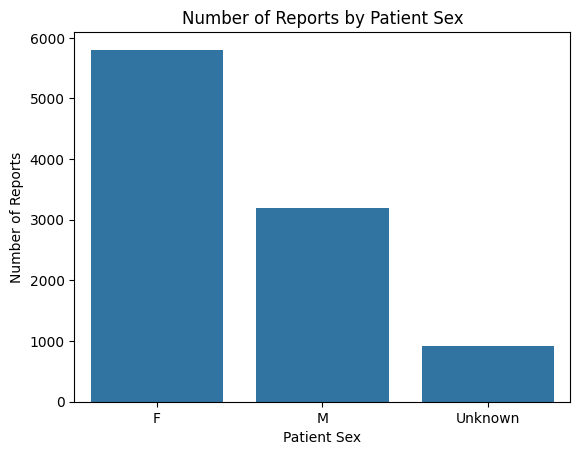

Patient Sex
F          5804
M          3195
Unknown     923
Name: count, dtype: int64

In [174]:
sns.countplot(data=df_primary, x='Patient Sex', order=df_primary['Patient Sex'].value_counts().index)
plt.title('Number of Reports by Patient Sex')
plt.xlabel('Patient Sex')
plt.ylabel('Number of Reports')
plt.show()

df_primary['Patient Sex'].value_counts()

### 📊 Distribution of Reports by Patient Age Group

| Age Group | Number of Reports |
|-----------|-------------------|
| Missing   | 3300              |
| 61-75     | 2183              |
| 46-60     | 1746              |
| 76-90     | 1093              |
| 31-45     | 823               |
| 19-30     | 387               |
| 0-18      | 330               |
| 90+       | 60                |

- **Insight**:
  - Patient **age data is missing** for **3300 records**, which is a significant portion of the dataset and limits age-related insights.
  - The **61–75 age group** reported the highest number of adverse events (**2183 reports**, approx. **23%** of total valid records).
  - Patients aged **90+** have the **least number of reported adverse events**.

> This indicates a higher frequency of adverse events reported among elderly patients, particularly in the 61–75 age range, which could be due to health complications in this group.


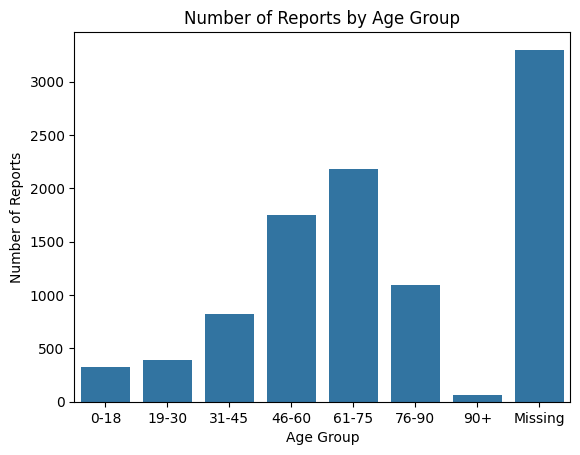

Age Group
Missing    3300
61-75      2183
46-60      1746
76-90      1093
31-45       823
19-30       387
0-18        330
90+          60
Name: count, dtype: int64

In [133]:
age_bins = [0, 18, 30, 45, 60, 75, 90, 120]
age_labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-90', '90+']
df_primary['Age Group'] = pd.cut(df_primary['Patient Age'], bins=age_bins, labels=age_labels)


df_primary['Age Group'] = df_primary['Age Group'].cat.add_categories('Missing')
df_primary['Age Group'] = df_primary['Age Group'].fillna('Missing')


sns.countplot(data=df_primary, x='Age Group')
plt.title('Number of Reports by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Reports')
plt.show() 

df_primary['Age Group'].value_counts()

### 🌍 Q. Distribution of Reports by Reporter Country

| Country                  | Number of Reports |
|--------------------------|-------------------|
| US                       | 7555              |
| GB (United Kingdom)      | 331               |
| COUNTRY NOT SPECIFIED    | 302               |
| CA (Canada)              | 221               |
| JP (Japan)               | 214               |
| ...                      | ...               |

- **Insight**:
  - The **United States** accounts for the **majority of adverse event reports** (**7555 reports**), which is expected due to the dataset being sourced from the **OpenFDA** platform.
  - Other countries like **GB (UK)**, **Canada**, and **Japan** contribute moderately.
  - A small number of records are from countries with only **1 report each**, indicating either low reporting activity or data sparsity.

> The dominance of the US in this dataset highlights the reporting strength of the American pharmacovigilance system and possibly the reach of the FDA surveillance infrastructure.

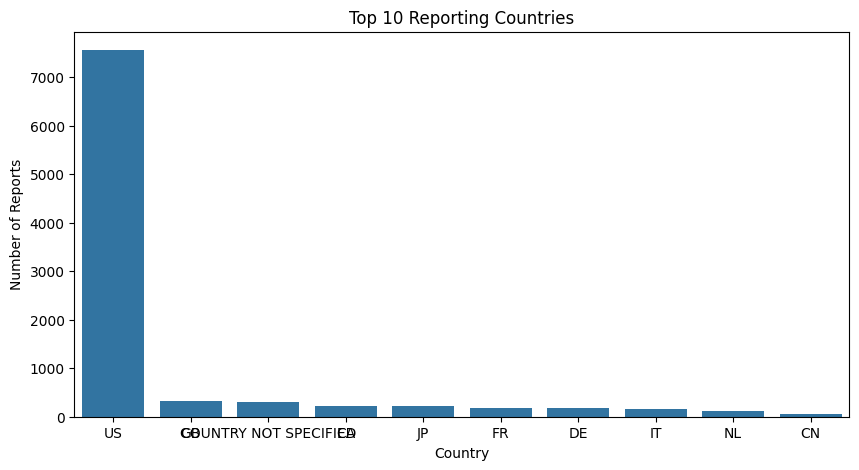

Reporter Country
US                       7555
GB                        331
COUNTRY NOT SPECIFIED     302
CA                        221
JP                        214
                         ... 
CR                          1
SZ                          1
SI                          1
LT                          1
CANADA                      1
Name: count, Length: 75, dtype: int64

In [175]:
top_countries = df_primary['Reporter Country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Reporting Countries')
plt.ylabel('Number of Reports')
plt.xlabel('Country')
plt.show()

df_primary['Reporter Country'].value_counts()

### ⚠️ Q. Serious vs Non-Serious Cases

| Seriousness Code | Description       | Count |
|------------------|-------------------|-------|
| 1                | Serious Case      | 5301  |
| 2                | Non-Serious Case  | 4621  |

- **Insight**:
  - Out of approx. 10,000 reports (9922 precise), **53%** were classified as **Serious Cases**, while **46%** were **Non-Serious**.
  - This reflects a **nearly balanced distribution**, with a slight lean toward serious adverse events.
  - These insights are critical when assessing the overall safety and impact of drugs in real-world usage.

> Note: In the dataset, `1 = Serious`, `2 = Non-Serious` as per standard FDA coding.

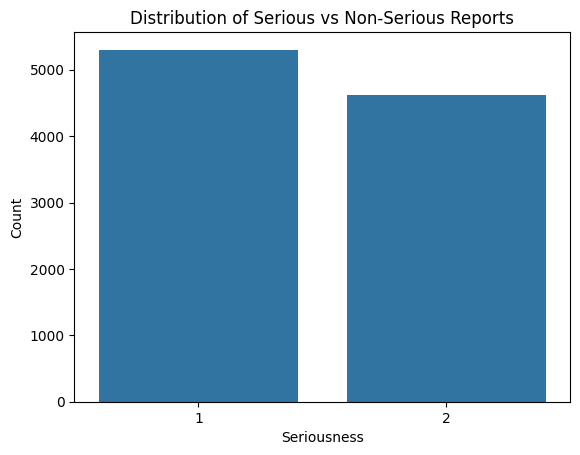

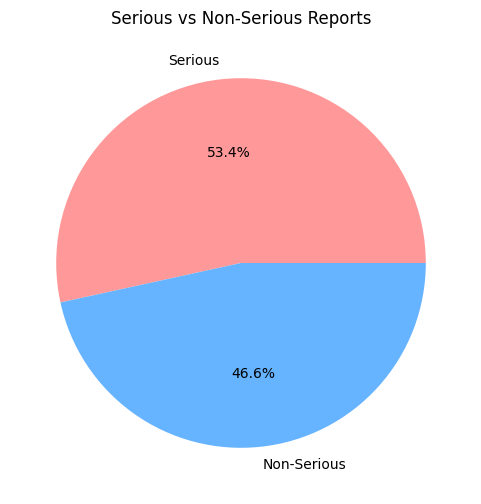

In [185]:
sns.countplot(data=df_primary, x='Serious')
plt.title('Distribution of Serious vs Non-Serious Reports')
plt.xlabel('Seriousness')
plt.ylabel('Count')
plt.show()

df_primary['Serious'].value_counts()


# Pie Chart: Serious vs Non-Serious Cases
serious_counts = df_primary['Serious'].value_counts().rename({1: 'Serious', 2: 'Non-Serious'})

plt.figure(figsize=(6,6))
plt.pie(serious_counts, labels=serious_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Serious vs Non-Serious Reports')
plt.show()

### ⚠️ Q. Number of Reports Resulted in Deaths

| Seriousness Death Code | Description         | Count |
|------------------------|---------------------|-------|
| 0                      | No Death Reported   | 9226  |
| 1                      | Death Reported      | 691   |
| 2                      | Unknown/Other Value | 5     |

- **Insight**:
  - **Deaths were reported in 691 out of 10,000 cases**, making it roughly **6.9%** of total reports.
  - A large majority (**92.3%**) of cases did **not result in death**.
  - The few entries with code `2` may represent **data inconsistencies** or misclassified entries and can be further reviewed.

> Note: In this dataset, `1 = Death`, `0 = No Death`, and `2` seems to be an outlier or malformed input.

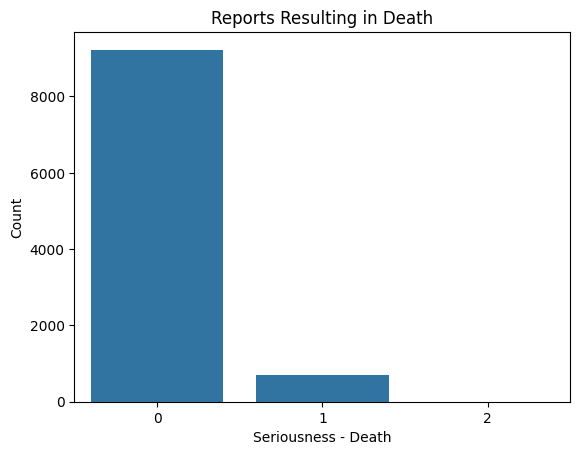

Seriousness Death
0    9226
1     691
2       5
Name: count, dtype: Int64

In [146]:
sns.countplot(data=df_primary, x='Seriousness Death')
plt.title('Reports Resulting in Death')
plt.xlabel('Seriousness - Death')
plt.ylabel('Count')
plt.show()

df_primary['Seriousness Death'].value_counts()

### 📈 Time Trend Analysis

#### Q: How has the number of reports changed over time?

- The number of adverse event reports shows variation across years.
- **2014** recorded the **highest number of reports**, indicating either:
  - A peak in adverse drug events that year,
  - Increased pharmacovigilance activity,
  - Or improved reporting systems and awareness.

> This trend insight can help regulatory bodies or pharmaceutical companies identify periods of increased risk or reporting behavior and investigate further.

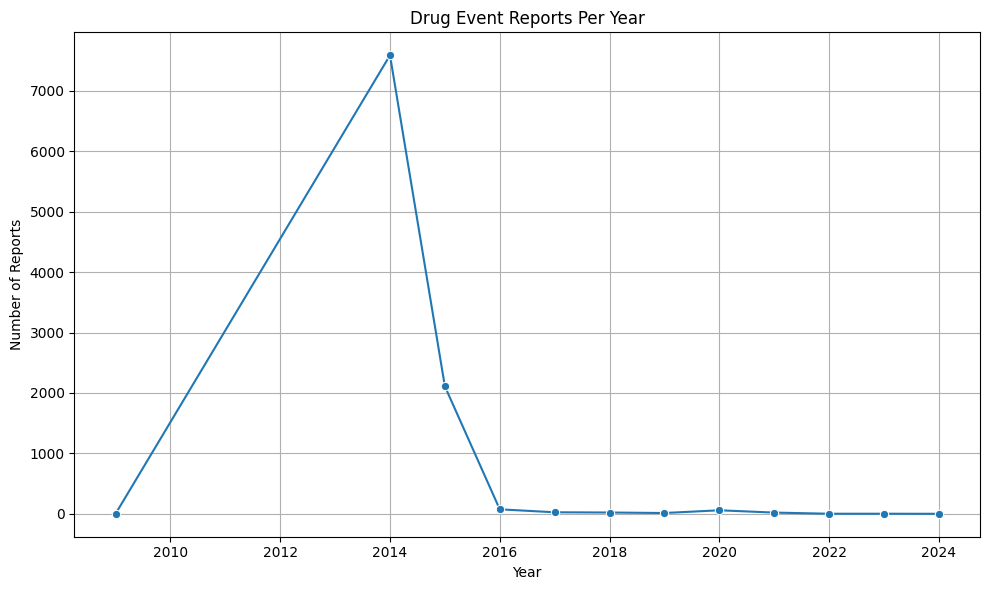

In [ ]:
# Extract year and month
df_primary['Year'] = df_primary['T_Date'].dt.year
df_primary['Month'] = df_primary['T_Date'].dt.month

# Reports per year
reports_per_year = df_primary.groupby('Year').size().reset_index(name='Report Count')


plt.figure(figsize=(10, 6))
sns.lineplot(data=reports_per_year, x='Year', y='Report Count', marker='o')
plt.title('Drug Event Reports Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.grid(True)
plt.tight_layout()
plt.show()


### 📅 Q: Are there seasonal trends in reporting?

- A monthly breakdown of adverse event reports reveals a **seasonal pattern**.
- **August** shows the **highest number of reports**, followed by **September** and **October**.
- This may suggest:
  - Increased drug usage or adverse event occurrences during these months,
  - Seasonal illnesses or conditions requiring medication,
  - Or higher vigilance/reporting practices during this period.

/var/folders/l6/hmqfvyqx5jxf3rgqv74jqk100000gn/T/ipykernel_3764/118297672.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_trend, x='Month', y='Report Count', palette='coolwarm')


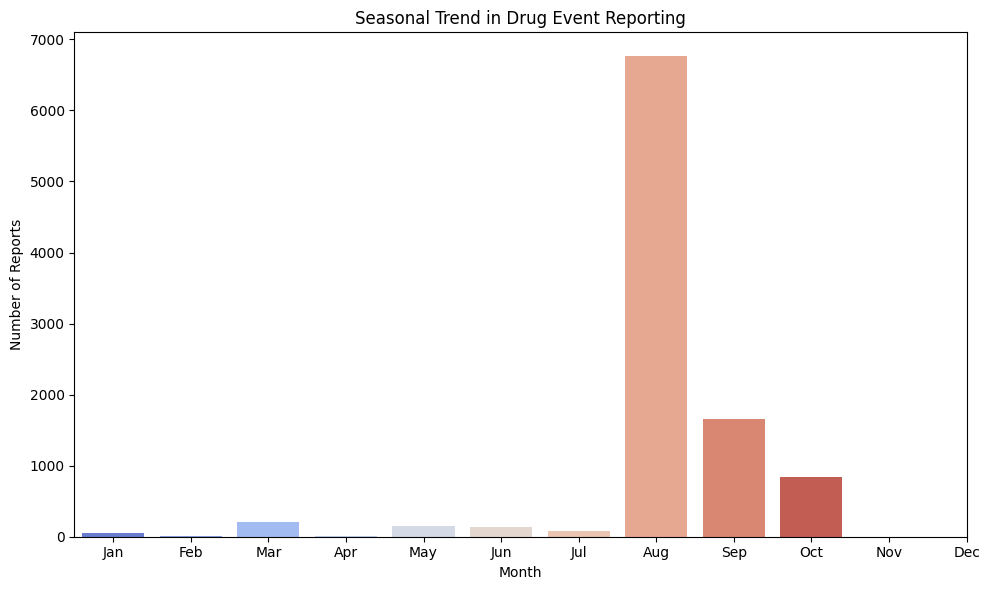

In [148]:
# If not already extracted
df_primary['Month'] = df_primary['T_Date'].dt.month

# Group by month (across years)
monthly_trend = df_primary.groupby('Month').size().reset_index(name='Report Count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_trend, x='Month', y='Report Count', palette='coolwarm')
plt.title('Seasonal Trend in Drug Event Reporting')
plt.xlabel('Month')
plt.ylabel('Number of Reports')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.show()

### 💊 Drug Analysis

#### Q: What are the Top 10 Most Frequently Reported Drugs?

The dataset shows that the following drugs were reported most frequently in adverse event reports:

1. **Letairis**
2. **Jakafi**
3. **LIPITOR**
4. **DIANEAL LOW CALCIUM**   
5. **TECFIDERA**               
6. **ASPIRIN**                 
7.  **ADCIRCA**                 
8.  **REVATIO**                
9.  **LYRICA**                  
10. **AVONEX**                  

- These drugs are either widely prescribed or closely monitored, leading to higher reporting.
- It may also reflect their usage in high-risk populations or for chronic conditions.

> Further analysis can explore if these drugs are linked to serious outcomes or specific types of adverse reactions.

/var/folders/l6/hmqfvyqx5jxf3rgqv74jqk100000gn/T/ipykernel_3764/3248050965.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_drugs, x='Report Count', y='Drug Name', palette='Blues_r')


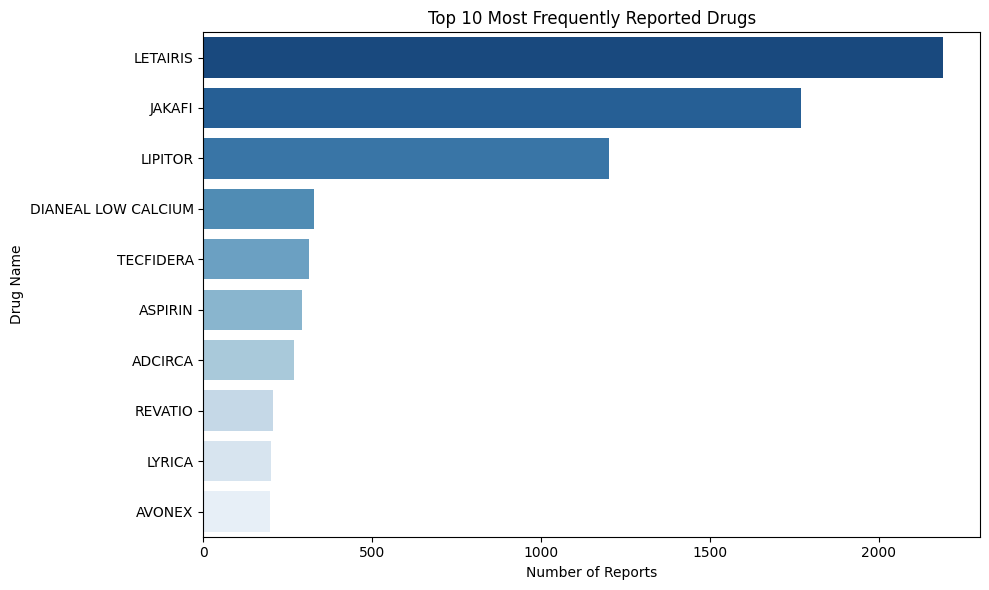

drug_name
LETAIRIS               2191
JAKAFI                 1770
LIPITOR                1202
DIANEAL LOW CALCIUM     327
TECFIDERA               312
ASPIRIN                 291
ADCIRCA                 269
REVATIO                 207
LYRICA                  200
AVONEX                  197
Name: count, dtype: int64

In [176]:
# Count the number of times each drug appears
top_drugs = df_drugs['drug_name'].value_counts().head(10).reset_index()
top_drugs.columns = ['Drug Name', 'Report Count']

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=top_drugs, x='Report Count', y='Drug Name', palette='Blues_r')
plt.title('Top 10 Most Frequently Reported Drugs')
plt.xlabel('Number of Reports')
plt.ylabel('Drug Name')
plt.tight_layout()
plt.show()


df_drugs['drug_name'].value_counts().head(10)

#### 💊 Q: What Are the Most Common Drug Indications?

Based on the drug details provided, the most frequently reported drug indications are:

1. **Product used for unknown indication** – ~4200 reports  
2. **Myelofibrosis** – ~1100 reports  
3. **Multiple Sclerosis** – ~900 reports  

- A significant portion of the records do not specify the drug indication, which could reflect data entry gaps or off-label usage.
- Among known indications, **Myelofibrosis** and **Multiple Sclerosis** are most common, indicating frequent treatment or close pharmacovigilance for these conditions.

> Further analysis could explore how indications relate to seriousness or specific reactions.

/var/folders/l6/hmqfvyqx5jxf3rgqv74jqk100000gn/T/ipykernel_3764/4042723752.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_indications, x='Report Count', y='Drug Indication', palette='Blues_r')


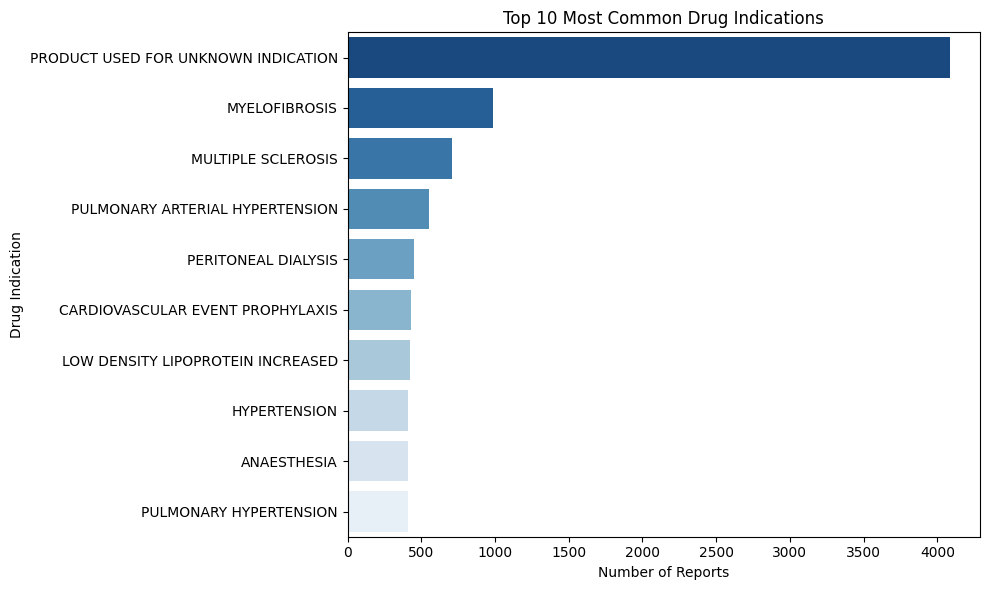

In [182]:
# Count the top 10 most common drug indications
top_indications = df_drugs['drug_indication'].value_counts().head(10).reset_index()
top_indications.columns = ['Drug Indication', 'Report Count']

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=top_indications, x='Report Count', y='Drug Indication', palette='Blues_r')
plt.title('Top 10 Most Common Drug Indications')
plt.xlabel('Number of Reports')
plt.ylabel('Drug Indication')
plt.tight_layout()
plt.show()


### 💊 Q: Which Routes of Administration Are Most Common in Serious Cases?

Understanding how a drug is administered can reveal patterns in adverse outcomes. Below are the top routes of administration reported in **serious cases**:

1. **Route 048** – ~6000 reports  
2. **Route 065** – ~3550 reports  
3. **Route 042** – ~1300 reports  

/var/folders/l6/hmqfvyqx5jxf3rgqv74jqk100000gn/T/ipykernel_3764/1130198517.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_routes, x='Serious Report Count', y='Administration Route', palette='Oranges_r')


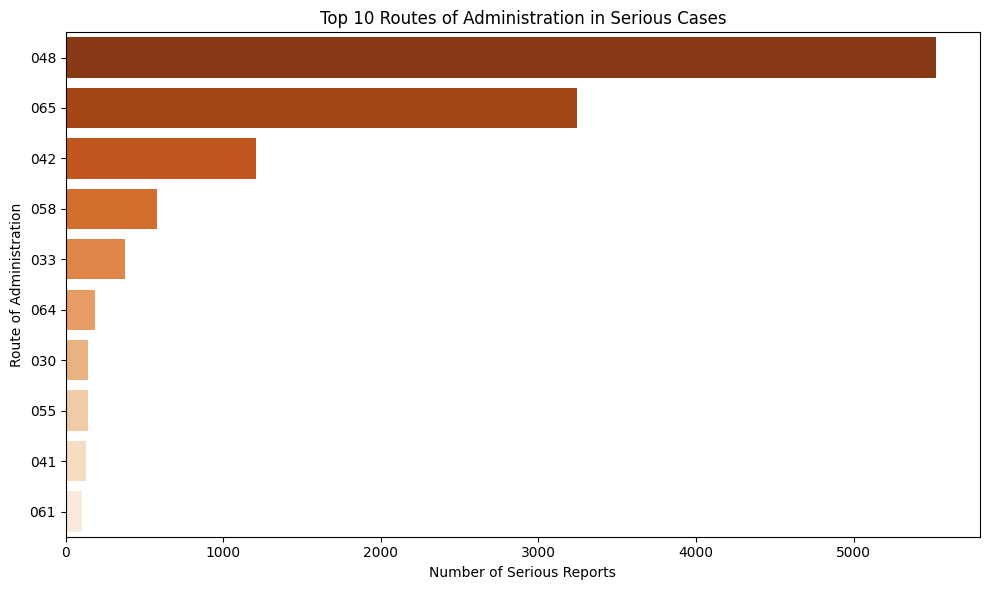

In [153]:
# Step 1: Filter serious cases
serious_cases = df_primary[df_primary['Serious'] == 1]  # Assuming 1 = serious

# Step 2: Merge with df_drugs on Safety Report ID
serious_drugs = pd.merge(serious_cases[['Safety Report ID']], df_drugs, on='Safety Report ID', how='inner')

# Step 3: Count most common routes
top_routes = serious_drugs['administration_route'].value_counts().head(10).reset_index()
top_routes.columns = ['Administration Route', 'Serious Report Count']

# Step 4: Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=top_routes, x='Serious Report Count', y='Administration Route', palette='Oranges_r')
plt.title('Top 10 Routes of Administration in Serious Cases')
plt.xlabel('Number of Serious Reports')
plt.ylabel('Route of Administration')
plt.tight_layout()
plt.show()

### 💊 Q: Which Drugs Are Most Commonly Associated with Serious or Death-Related Reports?

Understanding which drugs are frequently reported in **serious** or **death-related** cases can help identify high-risk medications that may require closer monitoring or additional investigation.

- **Lipitor** — ~1100 reports associated with **deaths**
- **Jakafi** — ~370 serious/death-related reports
- **Letairis** — ~220 serious/death-related reports

>  These insights suggest the need for pharmacovigilance teams to further analyze the context, dosage, and patient history for these drugs to assess risk-benefit profiles accurately.

/var/folders/l6/hmqfvyqx5jxf3rgqv74jqk100000gn/T/ipykernel_3764/3033301551.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_serious_drugs, x='Serious/Death Report Count', y='Drug Name', palette='Reds_r')


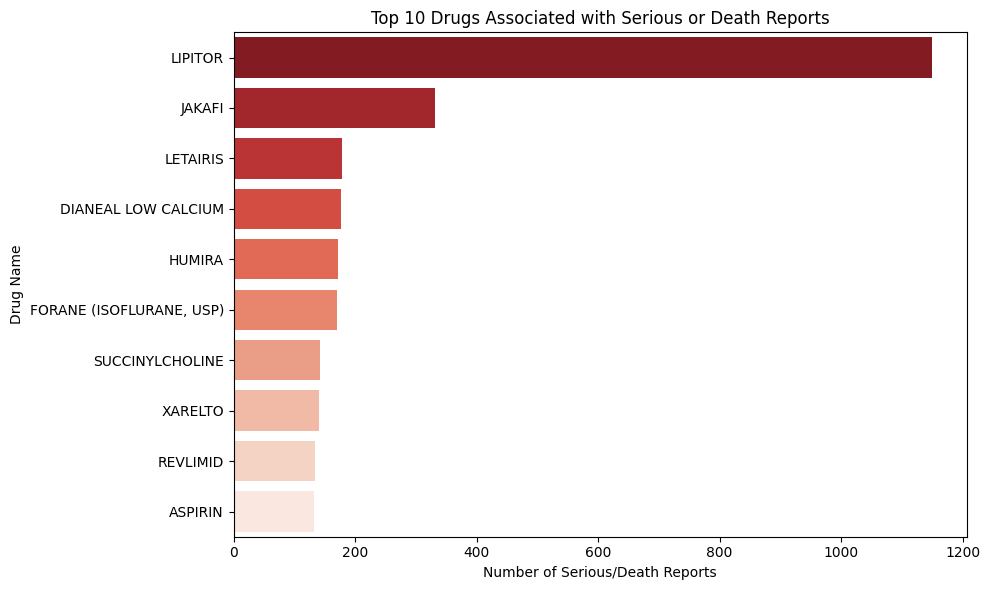

In [154]:
# Step 1: Filter serious or death cases
serious_or_death = df_primary[(df_primary['Serious'] == 1) | (df_primary['Seriousness Death'] == 1)]

# Step 2: Merge with drug data
serious_drug_reports = pd.merge(serious_or_death[['Safety Report ID']], df_drugs, on='Safety Report ID', how='inner')

# Step 3: Count top drugs
top_serious_drugs = serious_drug_reports['drug_name'].value_counts().head(10).reset_index()
top_serious_drugs.columns = ['Drug Name', 'Serious/Death Report Count']

# Step 4: Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_serious_drugs, x='Serious/Death Report Count', y='Drug Name', palette='Reds_r')
plt.title('Top 10 Drugs Associated with Serious or Death Reports')
plt.xlabel('Number of Serious/Death Reports')
plt.ylabel('Drug Name')
plt.tight_layout()
plt.show()

### ⚠️ Most Frequently Reported Adverse Reactions

The top adverse reactions reported in the dataset include:

- **Dyspnoea (shortness of breath)** — most frequent  
- **Drug ineffective** — indicating reported lack of efficacy  
- **Type 2 diabetes mellitus**  
- **Fatigue**  

> These reactions highlight common safety concerns and areas where drug performance or patient tolerance may be issues.

/var/folders/l6/hmqfvyqx5jxf3rgqv74jqk100000gn/T/ipykernel_3764/2513437181.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_reactions, x='Count', y='Reaction', palette='viridis')


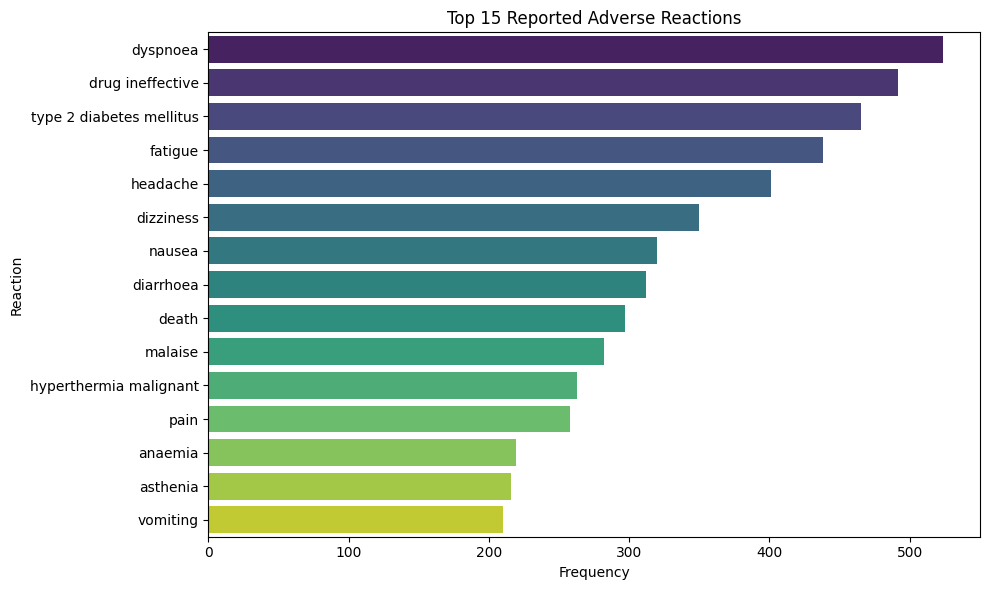

In [ ]:

top_reactions = df_reactions['reaction_list'].value_counts().head(15).reset_index()
top_reactions.columns = ['Reaction', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(data=top_reactions, x='Count', y='Reaction', palette='viridis')
plt.title('Top 15 Reported Adverse Reactions')
plt.xlabel('Frequency')
plt.ylabel('Reaction')
plt.tight_layout()
plt.show()

### ⚠️ Reactions Most Often Marked as Serious

Some adverse reactions were disproportionately reported in **serious cases**, including:

- **Type 2 diabetes mellitus**  
- **Death**  
- **Hyperthermia malignant**  

These reactions may indicate severe health implications and warrant closer investigation in pharmacovigilance studies.

/var/folders/l6/hmqfvyqx5jxf3rgqv74jqk100000gn/T/ipykernel_3764/1325331829.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_serious_reactions, x='Serious Report Count', y='Reaction', palette='Reds_r')


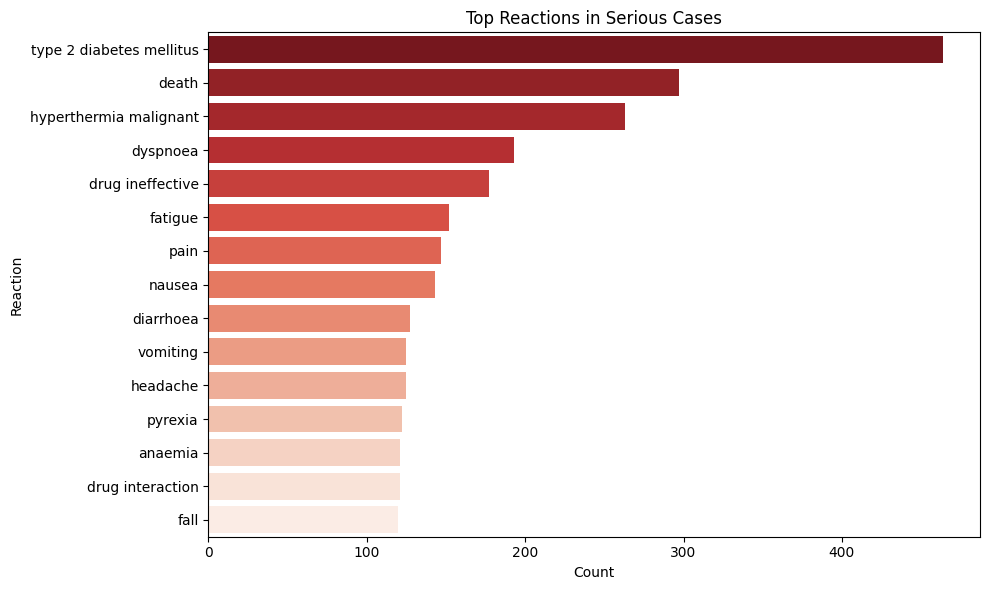

In [ ]:


# Merge with serious reports
serious_reactions = pd.merge(df_primary[df_primary['Serious'] == 1][['Safety Report ID']], 
                             df_reactions, on='Safety Report ID')

top_serious_reactions = serious_reactions['reaction_list'].value_counts().head(15).reset_index()
top_serious_reactions.columns = ['Reaction', 'Serious Report Count']

plt.figure(figsize=(10,6))
sns.barplot(data=top_serious_reactions, x='Serious Report Count', y='Reaction', palette='Reds_r')
plt.title('Top Reactions in Serious Cases')
plt.xlabel('Count')
plt.ylabel('Reaction')
plt.tight_layout()
plt.show()

### ⚠️ Reactions by Gender

- **Female patients** have reported the highest number of adverse reactions across all types.
- **Male patients** follow in reporting frequency.
- A **notable number of reports have missing gender data**, which may introduce bias or misinterpretation in gender-specific insights.

> This suggests that women may be more affected or more likely to report ADRs, but further investigation is needed due to missing data.



/var/folders/l6/hmqfvyqx5jxf3rgqv74jqk100000gn/T/ipykernel_3764/4208060354.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_gender_reactions = gender_reactions.groupby('Patient Sex').apply(lambda x: x.sort_values('Count', ascending=False).head(5)).reset_index(drop=True)


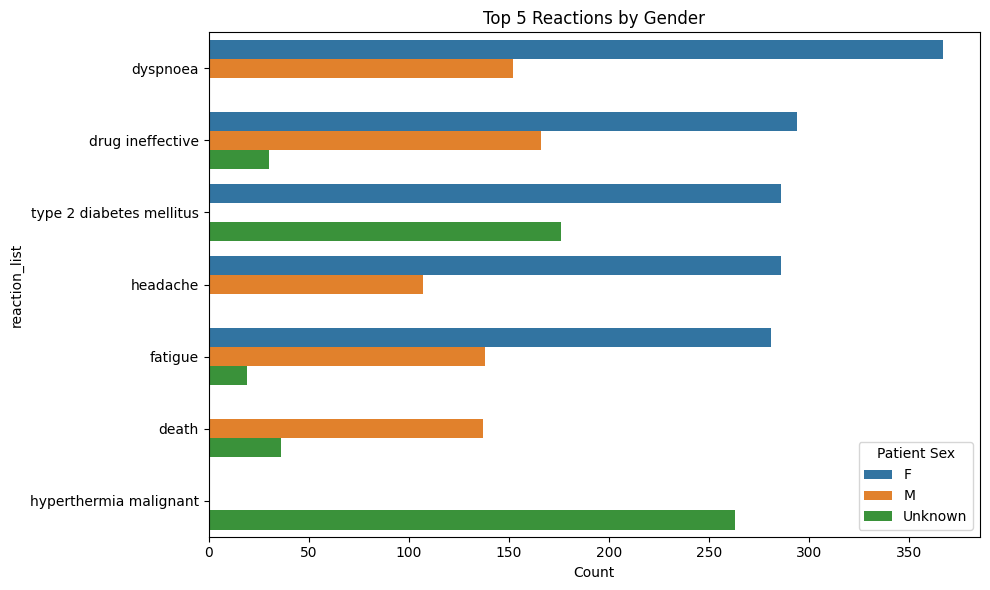

In [ ]:

# Merge with patient info
reaction_demographics = pd.merge(df_reactions, df_primary[['Safety Report ID', 'Patient Sex', 'Age Group']], 
                                 on='Safety Report ID')

# Top reactions by gender
gender_reactions = reaction_demographics.groupby(['Patient Sex', 'reaction_list']).size().reset_index(name='Count')
top_gender_reactions = gender_reactions.groupby('Patient Sex').apply(lambda x: x.sort_values('Count', ascending=False).head(5)).reset_index(drop=True)

plt.figure(figsize=(10,6))
sns.barplot(data=top_gender_reactions, x='Count', y='reaction_list', hue='Patient Sex')
plt.title('Top 5 Reactions by Gender')
plt.tight_layout()
plt.show()